In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
dft100 = pd.read_csv('02_19/perfcpu/100.csv')
dft100  ["alarmas"]= "100"

dft200 = pd.read_csv('02_19/perfcpu/200.csv')
dft200  ["alarmas"]= "200"

dft300 = pd.read_csv('02_19/perfcpu/300.csv')
dft300  ["alarmas"]= "300"

dft400 = pd.read_csv('02_19/perfcpu/400.csv')
dft400  ["alarmas"]= "400"

dft500 = pd.read_csv('02_19/perfcpu/500.csv')
dft500  ["alarmas"]= "500"

dft600 = pd.read_csv('02_19/perfcpu/600.csv')
dft600  ["alarmas"]= "600"

dft700 = pd.read_csv('02_19/perfcpu/700.csv')
dft700  ["alarmas"]= "700"

dft800 = pd.read_csv('02_19/perfcpu/800.csv')
dft800  ["alarmas"]= "800"

In [10]:
dft800

,hora,cpu,alarmas
0,18:41:41.339468344,32.4,800
1,18:41:42.468342175,27.8,800
2,18:41:43.506398321,27.1,800
3,18:41:44.532145592,26.9,800
4,18:41:45.553219385,29.7,800
5,18:41:46.574873854,16.8,800
6,18:41:47.591862553,33.3,800
7,18:41:48.611790515,83.4,800
8,18:41:49.729358383,95.7,800
9,18:41:51.038648677,92.7,800


In [12]:
def Append8(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7,mdtf8):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    mdtf1 = mdtf1.append(mdtf7)
    return mdtf1.append(mdtf8)

def Append8andCast(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7,mdtf8, O_column, simbol,value):
    mdtf1 = Append8(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7,mdtf8)
    mdtf1[O_column] = CastOutLayers(mdtf1, O_column, simbol,value)
    return mdtf1

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='alarmas', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def GetCutdf(mdfpost,column,signo,val):
    if signo == '<':
        return  mdfpost[mdfpost[column] < val ][[column,'alarmas']].reset_index(drop=True)
    else:
        return  mdfpost[mdfpost[column] > val ][[column,'alarmas']].reset_index(drop=True)
    
def AppendAndPlot(ndf,O_column, N_column, simbol, value, morder):
    ndf = Append2(df1, df2, df3, df4,df5,df6).reset_index(drop=True)
    ndf[N_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,N_column,morder)

In [5]:
morder=["100","200","300","400","500","600","700","800"]

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


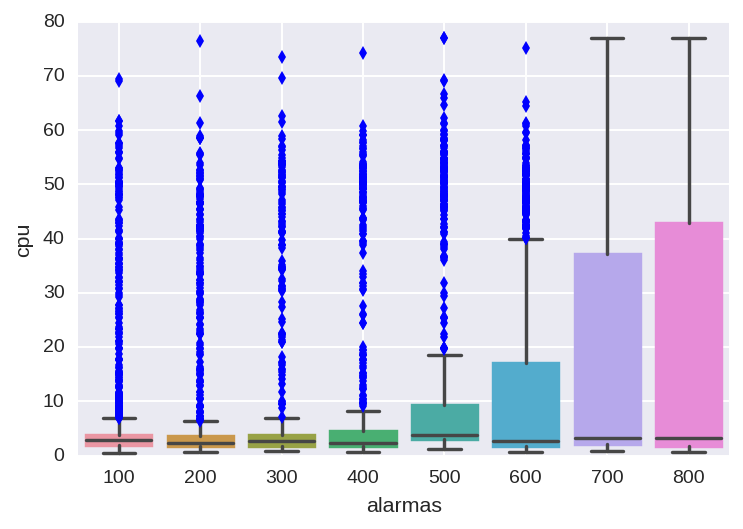

In [14]:
dft = Append8andCast(dft100, dft200, dft300, dft400, dft500, dft600, dft700, dft800,"cpu","<",77)
Plotbox(dft,"cpu",morder)